In [1]:
# Gene: RNF168 ENSG00000163961
# Transcript ID	Name	bp	Protein	Biotype	CCDS	UniProt Match	RefSeq Match	Flags
# ENST00000318037.3	RNF168-201	5347	571aa	Protein coding
# ENST00000437070.1	RNF168-202	2202	116aa	Nonsense mediated decay

In [2]:
import pandas, numpy
import scipy

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':16, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*2/3, 9*2/3), 
                            'axes.labelsize':16
                           })

# user-defined variables

In [4]:
control_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_control/data.site_proba.csv'
fto_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_fto/data.site_proba.csv'

# read information

In [5]:
df_control = pandas.read_csv(control_input_file, sep=',', index_col=0)
df_fto = pandas.read_csv(fto_input_file, sep=',', index_col=0)

print(df_control.shape)
print(df_fto.shape)

(501680, 5)
(793520, 5)


transcript_id
ENST00000216479.8   -0.003299
ENST00000216479.8    0.016589
ENST00000216479.8   -0.000122
ENST00000216479.8   -0.028683
ENST00000216479.8   -0.018518
ENST00000216479.8   -0.017205
ENST00000216479.8    0.004754
ENST00000216479.8   -0.024630
ENST00000216479.8    0.002927
ENST00000216479.8   -0.050209
ENST00000216479.8    0.038284
ENST00000216479.8    0.000244
ENST00000216479.8   -0.028047
ENST00000216479.8    0.015500
ENST00000216479.8    0.003027
ENST00000216479.8   -0.017087
ENST00000216479.8   -0.003675
ENST00000216479.8   -0.074997
ENST00000216479.8   -0.001364
ENST00000216479.8    0.029208
ENST00000216479.8   -0.071925
ENST00000216479.8   -0.001647
ENST00000216479.8    0.014505
ENST00000216479.8   -0.017117
ENST00000216479.8   -0.038608
ENST00000216479.8    0.089953
ENST00000216479.8   -0.016993
ENST00000216479.8    0.027892
ENST00000216479.8    0.021755
Name: probability_modified, dtype: float64

# comparison
each transcript, report as x the mean modification difference and y as the abs sum differential modifications
consider working with probability_modified instead mod_ratio because of quality scores? may need to check/follow up

21912
642


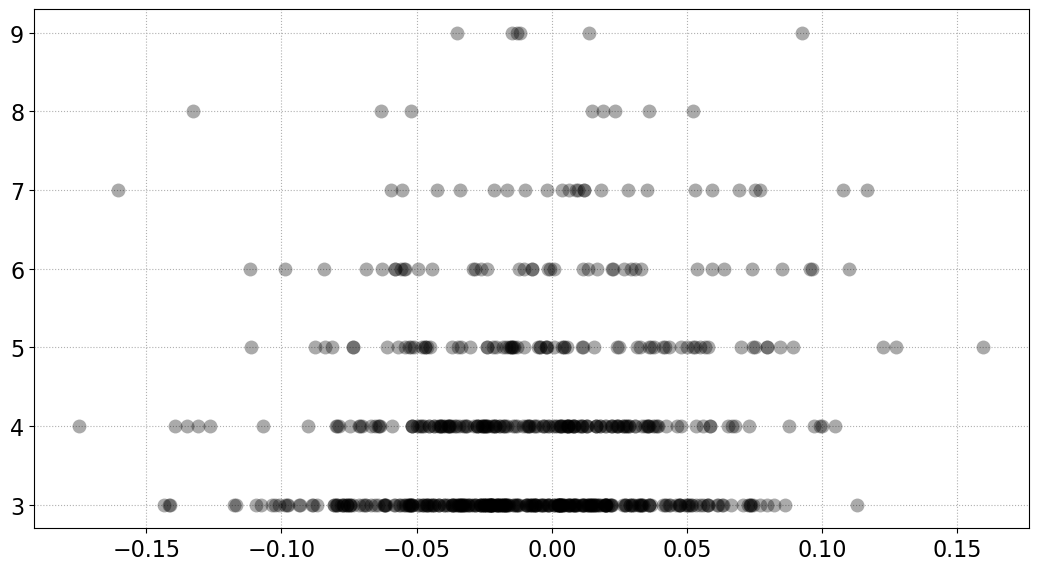

CPU times: user 2min 11s, sys: 571 ms, total: 2min 12s
Wall time: 2min 12s


In [32]:
%%time

all_transcripts = list(set(df_control.index) & set(df_fto.index))
all_transcripts.sort()
print(len(all_transcripts))

x = []; y = []; z = []

for i in range(int(len(all_transcripts)*0.50)):
    
    transcript = all_transcripts[i]
    #print(transcript)
    
    ss_control = df_control.loc[transcript, ]
    ss_fto = df_fto.loc[transcript, ]

    if (isinstance(ss_control, pandas.DataFrame) == False) | (isinstance(ss_fto, pandas.DataFrame) == False):     
        #print('\t dropping {} because of lack of data'.format(transcript))
        pass
    else:
        common_locations = list(set(ss_control['transcript_position']) & set(ss_fto['transcript_position']))
        if len(common_locations) < 5:
            #print('\t dropping {} because of few measurements'.format(transcript))
            pass
        else:
            
            common_locations.sort()
    
            cdf_control = ss_control[ss_control['transcript_position'].isin(common_locations)]
            cdf_fto = ss_fto[ss_fto['transcript_position'].isin(common_locations)]
    
            probs_control = cdf_control['probability_modified'].values
            probs_fto = cdf_fto['probability_modified'].values

            number_of_marks = 0
            differential_marks = []
            for i in range(len(probs_control)):
                if numpy.min([probs_control[i], probs_fto[i]]) > 0.9:
                    number_of_marks = number_of_marks + 1
                    #print('\t mark found')
                    difference = probs_fto[i] - probs_control[i]
                    differential_marks.append(difference)
            # print differences
            #print(number_of_marks, sum(differential_marks), differential_marks)
            #print()
            if len(differential_marks) > 2:
                x.append(sum(differential_marks))
                y.append(number_of_marks)
                #print(y, numpy.min(differential_marks), numpy.max(differential_marks))

print(len(x))
matplotlib.pyplot.plot(x, y, 'o', alpha=1/3, color='black', mew=0, markersize=10)
#matplotlib.pyplot.plot(common_locations, probs_fto, 'o', alpha=1/3, color='gold', mew=0, markersize=10)
#matplotlib.pyplot.ylim(0, 1)
#matplotlib.pyplot.xlabel('Transcript location (bp)')
#matplotlib.pyplot.ylabel('m6A probability')
matplotlib.pyplot.grid(ls=':', zorder=0)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()            

In [ ]:
#methylation_differences = probs_fto.sub(probs_control)


            #matplotlib.pyplot.plot(common_locations, probs_control, 'o', alpha=1/3, color='black', mew=0, markersize=10)
            #matplotlib.pyplot.plot(common_locations, probs_fto, 'o', alpha=1/3, color='gold', mew=0, markersize=10)
            #matplotlib.pyplot.ylim(0, 1)
            #matplotlib.pyplot.xlabel('Transcript location (bp)')
            #matplotlib.pyplot.ylabel('m6A probability')
            #matplotlib.pyplot.grid(ls=':', zorder=0)
            #matplotlib.pyplot.tight_layout()
            #matplotlib.pyplot.show()

In [15]:
cdf_fto

,transcript_position,n_reads,probability_modified,kmer,mod_ratio
transcript_id,,,,,
ENST00000216479.8,119,161,0.041395,AGACC,0.012422
ENST00000216479.8,220,180,0.086005,AAACA,0.038889
ENST00000216479.8,308,190,0.004032,TAACA,0.000000
ENST00000216479.8,324,174,0.065805,AAACT,0.017241
ENST00000216479.8,354,160,0.034423,AAACT,0.006250
ENST00000216479.8,359,191,0.199073,AAACT,0.078534
ENST00000216479.8,364,176,0.051204,GGACA,0.011364
ENST00000216479.8,399,189,0.059396,GGACA,0.021164
ENST00000216479.8,431,183,0.034863,AAACA,0.005464


In [17]:
probs_fto

array([0.04139484, 0.08600546, 0.00403171, 0.06580549, 0.03442262,
       0.19907272, 0.05120352, 0.0593962 , 0.03486251, 0.11347439,
       0.06234602, 0.02067232, 0.04532515, 0.28324479, 0.01125297,
       0.04786361, 0.00803244, 0.14010039, 0.02180621, 0.29826185,
       0.20366333, 0.28266719, 0.05080809, 0.50406945, 0.67193288,
       0.27818021, 0.43759167, 0.14778019, 0.04865199])